# Quiz 3: Machine Learning

Dataset link: https://www.kaggle.com/datasets/whenamancodes/predict-diabities/code

# 1. Importación de los datos

In [59]:
import pandas as pd

diabetes = pd.read_csv('.\Datain\diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
print("="*64)
print('The datset has {0} obs and {1} columns.'.format(diabetes.shape[0], diabetes.shape[1]))
print("="*64)

print("Unique values: ")
print(diabetes.nunique())
print("="*64)

print("Missing values:")
print(diabetes.isnull().sum())



The datset has 768 obs and 9 columns.
Unique values: 
Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64
Missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [61]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# 2. EDA

## 2.1. Distribución univariada

Variable: Pregnancies
Variable: Glucose
Variable: BloodPressure
Variable: SkinThickness
Variable: Insulin
Variable: BMI
Variable: DiabetesPedigreeFunction
Variable: Age
Variable: Outcome


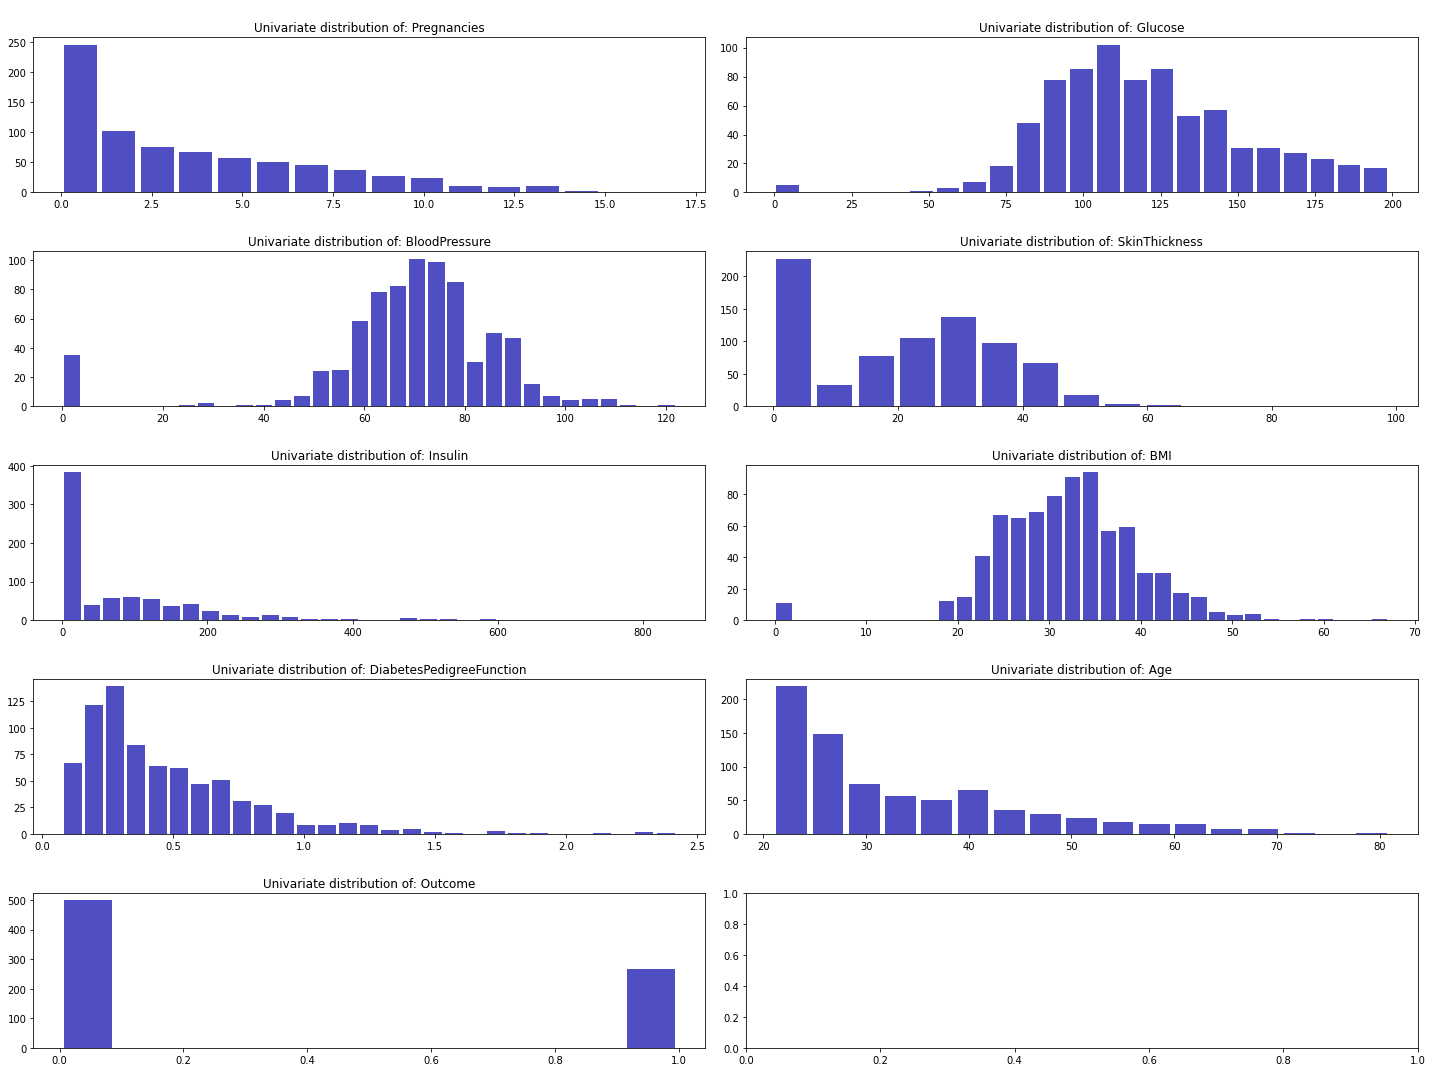

In [62]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(5, 2, figsize = (20, 15))
i = 0
k = 0

for col in diabetes.columns:
    if (i % 2 == 0) & (i != 0):
        k += 1
    print("Variable: {0}".format(col))
    ax[k, i % 2].hist(diabetes[col], bins='auto', color='#0504aa',
                                alpha=0.7, rwidth=0.85)
    ax[k, i % 2].set_title("\nUnivariate distribution of: {0}".format(col))
    

    i += 1

fig.tight_layout()

Hallazgos importantes:

* `Glucose`, `BMI` and `BloodPressure` has values with 0. As we know, no person has ever lived many years with blood pressure in 0. Elimination may be considered.

### 2.1.1. Outliners

Number of obs:	 768 
Number of cols:	 9
Variable: Pregnancies
Variable: Glucose
Variable: BloodPressure
Variable: SkinThickness
Variable: Insulin
Variable: BMI
Variable: DiabetesPedigreeFunction
Variable: Age
Variable: Outcome


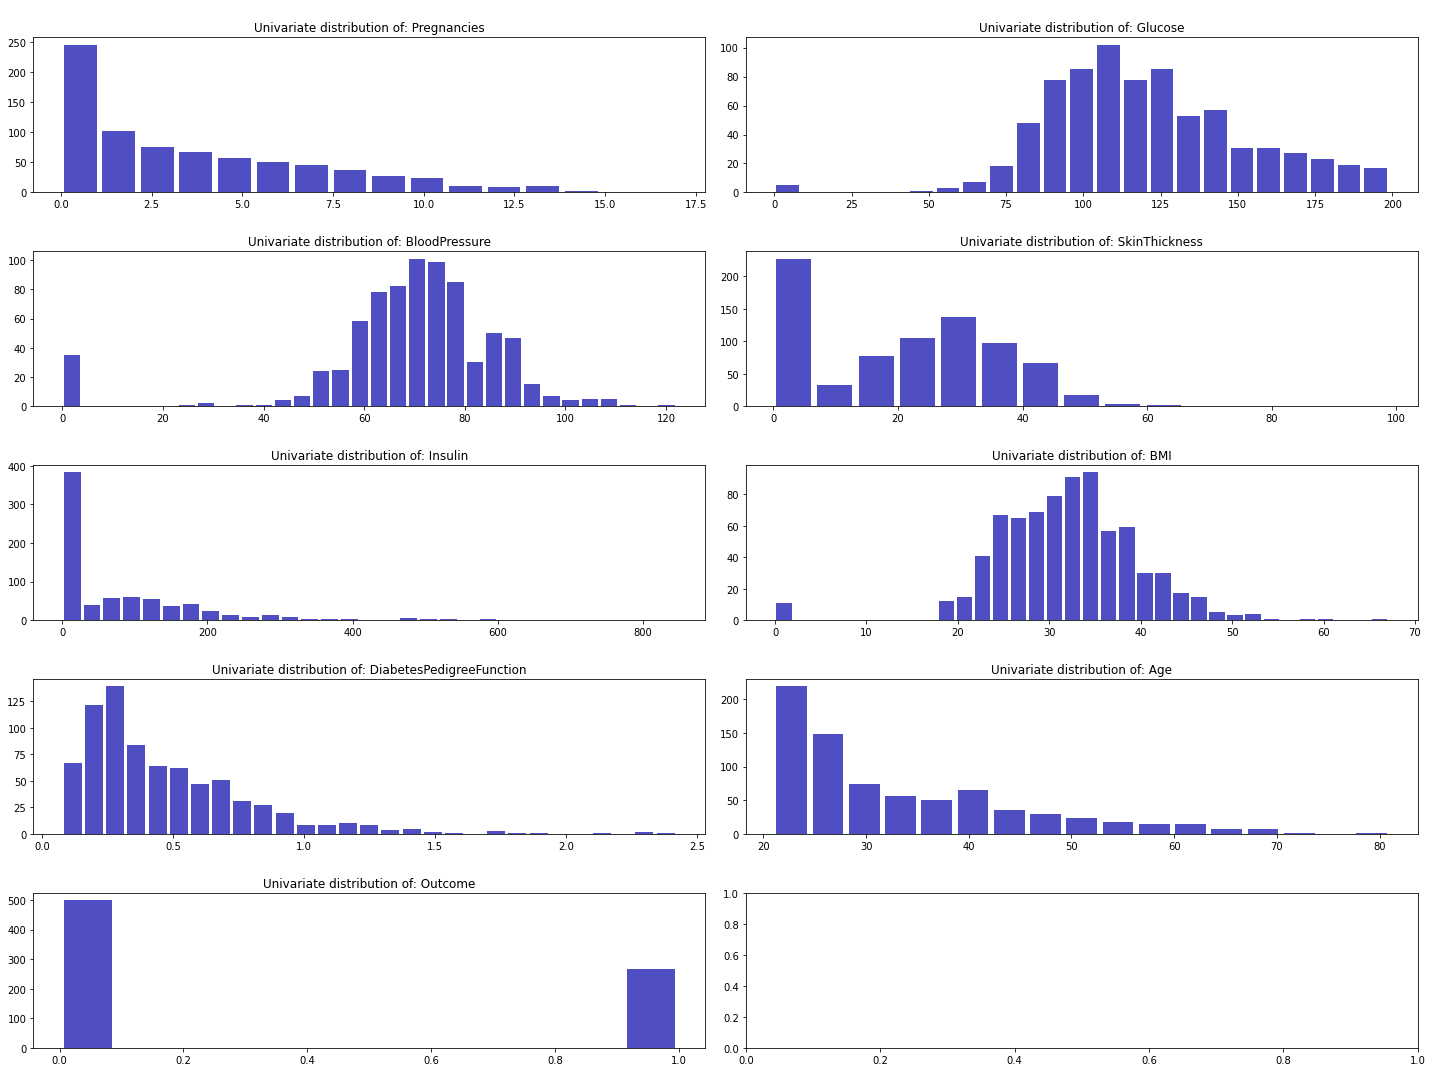

In [63]:
import matplotlib.pyplot as plt

#diabetes = diabetes[diabetes.BloodPressure != 0]
#diabetes = diabetes[diabetes.BMI != 0]
#diabetes = diabetes[diabetes.Glucose != 0]

print('Number of obs:\t {0} \nNumber of cols:\t {1}'.format(diabetes.shape[0], diabetes.shape[1]))

fig, ax = plt.subplots(5, 2, figsize = (20, 15))
i = 0
k = 0

for col in diabetes.columns:
    if (i % 2 == 0) & (i != 0):
        k += 1
    print("Variable: {0}".format(col))
    ax[k, i % 2].hist(diabetes[col], bins='auto', color='#0504aa',
                                alpha=0.7, rwidth=0.85)
    ax[k, i % 2].set_title("\nUnivariate distribution of: {0}".format(col))
    
    i += 1

fig.tight_layout()

# 4. Machine Learning model

## 4.1. Train & test split

In [64]:
import pandas as pd

from sklearn.model_selection import train_test_split

# Main datasets
X = diabetes.drop(["Outcome"], axis = 1)
y = diabetes["Outcome"]

# Setting category type to outcome
y = pd.Categorical(y)

# Train - test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 91)

print("Train dataset size: ", X_train.shape[0])
print("Test dataset size: ", X_test.shape[0])
print("Train dataset size: ", y_train.shape[0])
print("Test dataset size: ", y_test.shape[0])


Train dataset size:  614
Test dataset size:  154
Train dataset size:  614
Test dataset size:  154


## 4.2. Model selection

In [65]:
import pandas as pd
import joblib

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score


clf = {
    'Gradient' : GradientBoostingRegressor(),
    'LogisticRegression': LogisticRegression(),
    'DecisionTree' : DecisionTreeClassifier(),
    'Kneighbors': KNeighborsClassifier()
}

params = {
 'Gradient' : {
        'loss' : ['ls', 'lad'],
        'learning_rate' : [0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1.0]
    },
    'LogisticRegression': {
        'penalty': [None, 'l1', 'l2', 'elasticnet'],
        'C': [0.5, 1, 2, 3, 4, 5, 10, 100],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'fit_intercept': [True, False],
        'random_state': [91]
    },
    'DecisionTree' : {
        'criterion': ['gini', 'entropy', 'log_loss'],
        'splitter' : ['best', 'random'],
        'max_depth' : [None, 1, 2, 3, 4, 5, 10, 15, 20, 25, 30],
        'random_state': [91]
    },
    'Kneighbors': {
        'n_neighbors': range(1, 26),
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],

    }
}

best_score = 0
best_model = None

for name, clf in clf.items():
    # print(name, clf)
    grid_clf = GridSearchCV(clf, params[name],  cv = 5, scoring = 'balanced_accuracy').fit(X_train, y_train)
    score = grid_clf.best_score_

    if score > best_score:
        best_score = score
        best_model = grid_clf.best_estimator_

print("Best Score: {0}".format(best_score))
print("Best Model: {0}".format(best_model))
joblib.dump(best_model, './Models/best_model.pkl')



c:\Users\juanm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
c:\Users\juanm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\juanm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\juanm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "c:\Users\juanm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    re

Best Score: 0.7413022631377062
Best Model: LogisticRegression(C=0.5, random_state=91)


['./Models/best_model.pkl']

In [74]:
y_pred = best_model.predict(X_test)

balanced_accuracy_score(y_test, y_pred)

0.7370283018867925